In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [10]:
def plot_single_radar_chart(full_relearning, buffer_resampling, plot_filename=""):
    assert len(full_relearning) == len(buffer_resampling)

    labels = ["Time/epoch (s)", "                   GFLOPs/epoch", "Required samples per class                                      "]
    N = len(labels)
    _, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)    # Shift the starting angle to 90° (top)
    ax.set_theta_direction(-1)        # Clockwise direction

    buffer_resampling = np.array(buffer_resampling)/np.array(full_relearning)
    full_relearning = np.array(full_relearning)/np.array(full_relearning)

    # Repeat the first value to close the radar chart
    full_relearning = np.concatenate((full_relearning, [full_relearning[0]]))
    buffer_resampling = np.concatenate((buffer_resampling, [buffer_resampling[0]]))
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Close the shape

    ax.plot(angles, full_relearning, color='#E63946', linewidth=1, linestyle='solid', label="FR")
    ax.fill(angles, full_relearning, color='#E63946', alpha=0.3)

    ax.plot(angles, buffer_resampling, color="#009E73", linewidth=1, linestyle='solid', label="AMR")
    ax.fill(angles, buffer_resampling, color="#009E73", alpha=1.0)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["0.25x", "0.5x", "0.75x", "1.0x"])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

    plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1))
    if plot_filename != "" and len(plot_filename) > 0:
        plt.savefig(plot_filename, format="pdf", dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
def plot_radar_chart(methods, full_relearning_metrics, buffer_resampling_metrics, plot_filename=""):
    assert len(methods) == len(full_relearning_metrics) == len(buffer_resampling_metrics)

    labels = ["Time/epoch (s)", "                   GFLOPs/epoch", "Required samples per class                                      "]
    N = len(labels)
    _, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)    # Shift the starting angle to 90° (top)
    ax.set_theta_direction(-1)        # Clockwise direction

    full_relearning = np.array([1.0, 1.0, 1.0, 1.0])

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Close the shape
    ax.plot(angles, full_relearning, color='#E63946', linewidth=1, linestyle='solid', label="Full Relearning")
    ax.fill(angles, full_relearning, color='#E63946', alpha=0.3)

    for method, full_relearning, buffer_resampling in zip(methods, full_relearning_metrics, buffer_resampling_metrics):
        buffer_resampling = np.array(buffer_resampling)/np.array(full_relearning)
        full_relearning = np.array(full_relearning)/np.array(full_relearning)

        # Repeat the first value to close the radar chart
        buffer_resampling = np.concatenate((buffer_resampling, [buffer_resampling[0]]))

        ax.plot(angles, buffer_resampling, linewidth=1, linestyle='solid', label=f"Buffer Resampling {method}")
        ax.fill(angles, buffer_resampling, alpha=1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(["0.25×", "0.5×", "0.75×", "1.0×"])
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey')

    plt.legend(loc="upper left", bbox_to_anchor=(-0.5, 1.1))
    if plot_filename != "" and len(plot_filename) > 0:
        plt.savefig(plot_filename, format="pdf", dpi=300, bbox_inches='tight')
    plt.show()

In [64]:
def plot_grouped_bars(ax, data, x_labels, methods, colors, hatch_patterns, y_tick_max=101, errors=None):
    num_methods = len(methods)
    x = np.arange(len(x_labels))
    width = 0.125

    for i in range(num_methods):
        offset = (i - (num_methods - 1) / 2) * width
        yerr = errors[i] if errors is not None else None
        ax.bar(
            x + offset,
            data[i],
            width,
            label=methods[i],
            color=colors[i],
            hatch=hatch_patterns[i],
            yerr=yerr,
            capsize=2,
            error_kw=dict(lw=2)
        )

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=12)
    ax.set_yticks(list(range(0, y_tick_max, 10)))
    ax.yaxis.grid(True, linestyle='-.', linewidth=0.5)

# Fashion MNIST

In [13]:
fmnist_er_5000_n1_full_relearning = [(63.44 + 63.98 + 72.77)/3, 65766.85, 6000]
fmnist_er_5000_n1_buffer_resampling = [(21.72 + 21.98 + 28.26)/3, 21922.28, 1250]

fmnist_er_ace_5000_n1_full_relearning = [(87.97 + 102.11 + 122.02)/3, 65766.87, 6000]
fmnist_er_ace_5000_n1_buffer_resampling = [(28.81 + 29.00 + 40.46)/3, 21922.29, 1250]

fmnist_derpp_5000_n1_full_relearning = [(118.49 + 124.86 + 148.85)/3, 98650.29, 6000]
fmnist_derpp_5000_n1_buffer_resampling = [(39.88 + 39.24 + 47.93)/3, 32883.43, 1250]

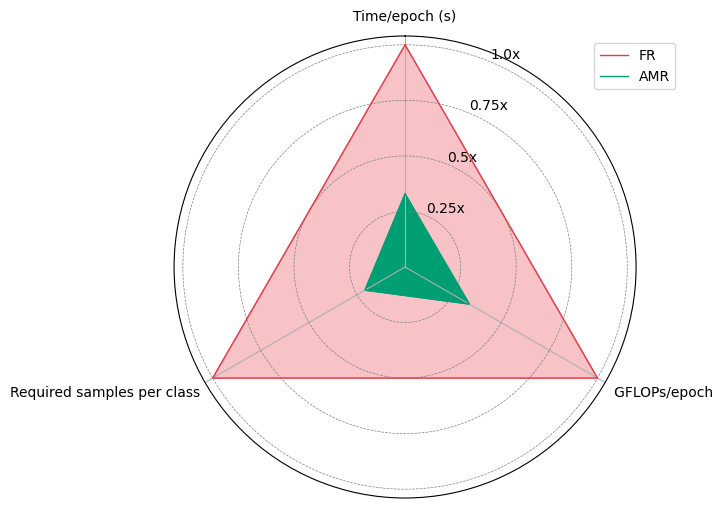

In [14]:
fmnist_full_relearning_metrics_b5000 = np.mean([fmnist_er_5000_n1_full_relearning, fmnist_er_ace_5000_n1_full_relearning, fmnist_derpp_5000_n1_full_relearning], axis=0).tolist()
fmnist_buffer_resampling_metrics_b5000 = np.mean([fmnist_er_5000_n1_buffer_resampling, fmnist_er_ace_5000_n1_buffer_resampling, fmnist_derpp_5000_n1_buffer_resampling], axis=0).tolist()
plot_single_radar_chart(fmnist_full_relearning_metrics_b5000, fmnist_buffer_resampling_metrics_b5000, "Radar-FashionMNIST.pdf")

# CIFAR10

## Computational Efficiency

### Buffer 500

In [15]:
c10_er_500_n1_full_relearning = [(34.72 + 34.89 + 40.96)/3, 66687.50, 5000]
c10_er_500_n1_buffer_resampling = [(11.27 + 11.73 + 11.83)/3, 22252.87, 125]

c10_er_ace_500_n1_full_relearning = [(58.07 + 66.25 + 66.87)/3, 66687.51, 5000]
c10_er_ace_500_n1_buffer_resampling = [(14.62 + 17.51 + 18.61)/3, 22252.87, 125]

c10_derpp_500_n1_full_relearning = [(96.16 + 97.90 + 99.18)/3, 100031.26, 5000]
c10_derpp_500_n1_buffer_resampling = [(35.10 + 38.97 + 41.10)/3, 33379.30, 125]

In [16]:
# methods = ["ER", "ER-ACE", "DER++"]
# c10_full_relearning_metrics_b500 = [c10_er_500_n1_full_relearning, c10_er_ace_500_n1_full_relearning, c10_derpp_500_n1_full_relearning]
# c10_buffer_resampling_metrics_b500 = [c10_er_500_n1_buffer_resampling, c10_er_ace_500_n1_buffer_resampling, c10_derpp_500_n1_buffer_resampling]
# plot_radar_chart(methods, c10_full_relearning_metrics_b500, c10_buffer_resampling_metrics_b500)

### Buffer 5000

In [17]:
c10_er_5000_n1_full_relearning = [(33.70 + 47.52 + 47.62)/3, 66687.50, 5000]
c10_er_5000_n1_buffer_resampling = [(13.83 + 14.41 + 16.84)/3, 22252.87, 1250]

c10_er_ace_5000_n1_full_relearning = [(69.01 + 69.76 + 71.60)/3, 66687.51, 5000]
c10_er_ace_5000_n1_buffer_resampling = [(20.41 + 21.00 + 26.65)/3, 22252.87, 1250]

c10_derpp_5000_n1_full_relearning = [(101.75 + 102.46 + 120.76)/3, 100031.26, 5000]
c10_derpp_5000_n1_buffer_resampling = [(33.35 + 34.29 + 39.83)/3, 33379.30, 1250]

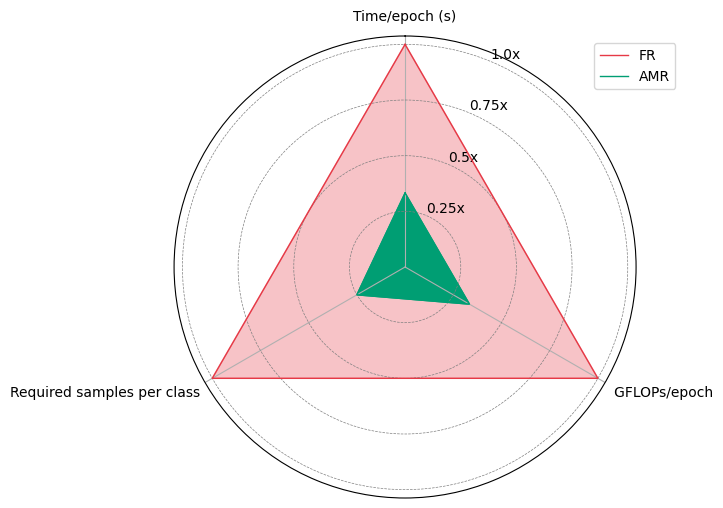

In [18]:
c10_full_relearning_metrics_b5000 = np.mean([c10_er_5000_n1_full_relearning, c10_er_ace_5000_n1_full_relearning, c10_derpp_5000_n1_full_relearning], axis=0).tolist()
c10_buffer_resampling_metrics_b5000 = np.mean([c10_er_5000_n1_buffer_resampling, c10_er_ace_5000_n1_buffer_resampling, c10_derpp_5000_n1_buffer_resampling], axis=0).tolist()
plot_single_radar_chart(c10_full_relearning_metrics_b5000, c10_buffer_resampling_metrics_b5000, "Radar-CIFAR10.pdf")

## Accuracy Bars

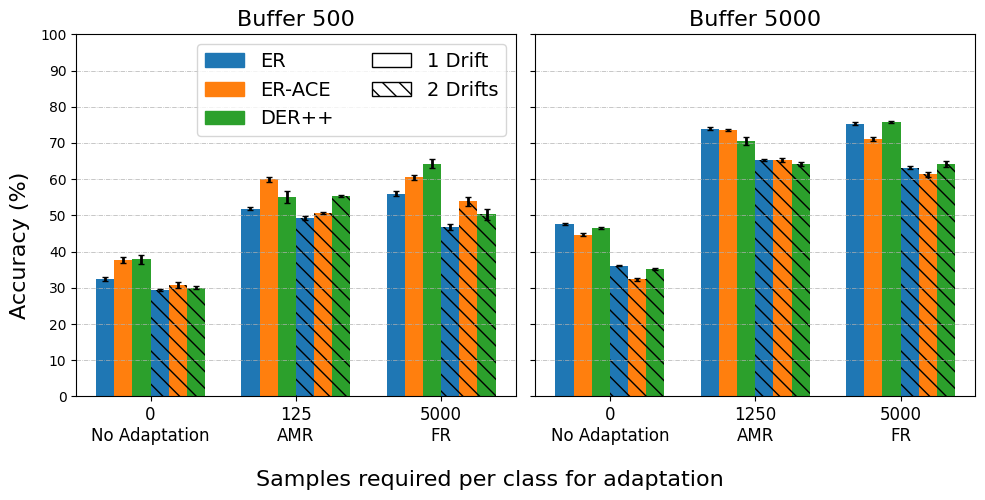

In [65]:
methods = ["ER", "ER-ACE", "DER++", "ER", "ER-ACE", "DER++"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#1f77b4", "#ff7f0e", "#2ca02c"]
hatch_patterns = ["", "", "", "\\\\", "\\\\", "\\\\"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

x_labels = ["0\nNo Adaptation", "125\nAMR", "5000\nFR"]
c10_acc_500 = np.array([
    [32.36, 51.88, 56.0], # ER n-1
    [37.68, 60.02, 60.50], # ER-ACE n-1
    [37.83, 55.13, 64.31], # DER++ n-1
    [29.32, 49.25, 46.88], # ER n-2
    [30.76, 50.62, 53.90], # ER-ACE n-2
    [30.07, 55.36, 50.36], # DER++ n-2

])
c10_acc_500_std = np.array([
    [0.51, 0.52, 0.69], # ER n-1
    [0.93, 0.67, 0.76], # ER-ACE n-1
    [1.24, 1.60, 1.24], # DER++ n-1
    [0.32, 0.60, 0.80], # ER n-2
    [0.77, 0.21, 1.24], # ER-ACE n-2
    [0.51, 0.31, 1.51], # DER++ n-2
])
plot_grouped_bars(axes[0], c10_acc_500, x_labels, methods, colors, hatch_patterns, errors=c10_acc_500_std)
axes[0].set_title("Buffer 500", fontsize=16)

method_legend = [mpatches.Patch(color=colors[i], label=methods[i]) for i in range(len(methods)//2)]

drift_legend = [
    mpatches.Patch(facecolor="#fff", edgecolor="black", label="1 Drift"),
    mpatches.Patch(facecolor="#fff", edgecolor="black", hatch="\\\\", label="2 Drifts")
]

custom_legend = method_legend + drift_legend
legend_labels = [m.get_label() for m in custom_legend]
axes[0].legend(custom_legend, legend_labels, ncol=2, prop={"size": 14})

x_labels = ["0\nNo Adaptation", "1250\nAMR", "5000\nFR"]
c10_acc_5000 = np.array([
    [47.56, 73.92, 75.27], # ER n-1
    [44.62, 73.58, 71.07], # ER-ACE n-1
    [46.58, 70.65, 75.76], # DER++ n-1
    [36.13, 65.27, 63.20], # ER n-2
    [32.37, 65.27, 61.31], # ER-ACE n-2
    [35.25, 64.24, 64.12], # DER++ n-2
])
c10_acc_5000_std = np.array([
    [0.22, 0.42, 0.41], # ER n-1
    [0.44, 0.32, 0.45], # ER-ACE n-1
    [0.33, 1.13, 0.25], # DER++ n-1
    [0.15, 0.36, 0.52], # ER n-2
    [0.43, 0.46, 0.75], # ER-ACE n-2
    [0.23, 0.62, 0.77], # DER++ n-2
])
plot_grouped_bars(axes[1], c10_acc_5000, x_labels, methods, colors, hatch_patterns, errors=c10_acc_5000_std)
axes[1].set_title("Buffer 5000", fontsize=16)

fig.supylabel("Accuracy (%)", fontsize=16)
fig.supxlabel("Samples required per class for adaptation", fontsize=16)

plt.tight_layout()
plt.savefig("CIFAR10-Accuracy-Gain-vs-Adaptation-Strategy.pdf", format="pdf", dpi=300)
plt.show()

# CIFAR100

## Computational Efficiency

### Buffer 5000

In [20]:
c100_er_5000_n1_full_relearning = [(40.63 + 47.87 + 49.53)/3, 64499.59, 500]
c100_er_5000_n1_buffer_resampling = [(4.79 + 4.87 + 6.21)/3, 11164.76, 100]

c100_er_ace_5000_n1_full_relearning = [(69.06 + 76.79 + 81.87)/3, 64499.64, 500]
c100_er_ace_5000_n1_buffer_resampling = [(7.59 + 7.69 + 7.71)/3, 11164.77, 100]

c100_derpp_5000_n1_full_relearning = [(102.51 + 109.63 + 109.92)/3, 96749.44, 500]
c100_derpp_5000_n1_buffer_resampling = [(10.18 + 11.13 + 13.11)/3, 16747.15, 100]

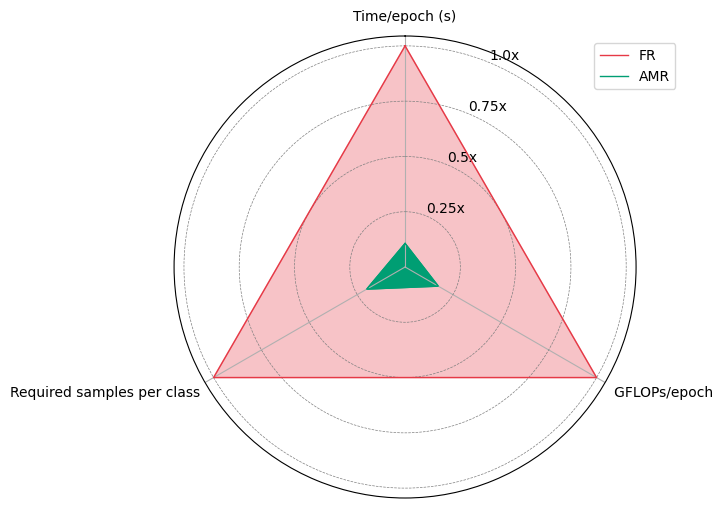

In [21]:
c100_full_relearning_metrics_b5000 = np.mean([c100_er_5000_n1_full_relearning, c100_er_ace_5000_n1_full_relearning, c100_derpp_5000_n1_full_relearning], axis=0).tolist()
c100_buffer_resampling_metrics_b5000 = np.mean([c100_er_5000_n1_buffer_resampling, c100_er_ace_5000_n1_buffer_resampling, c100_derpp_5000_n1_buffer_resampling], axis=0).tolist()
plot_single_radar_chart(c100_full_relearning_metrics_b5000, c100_buffer_resampling_metrics_b5000, "Radar-CIFAR100.pdf")

## Accuracy Bars

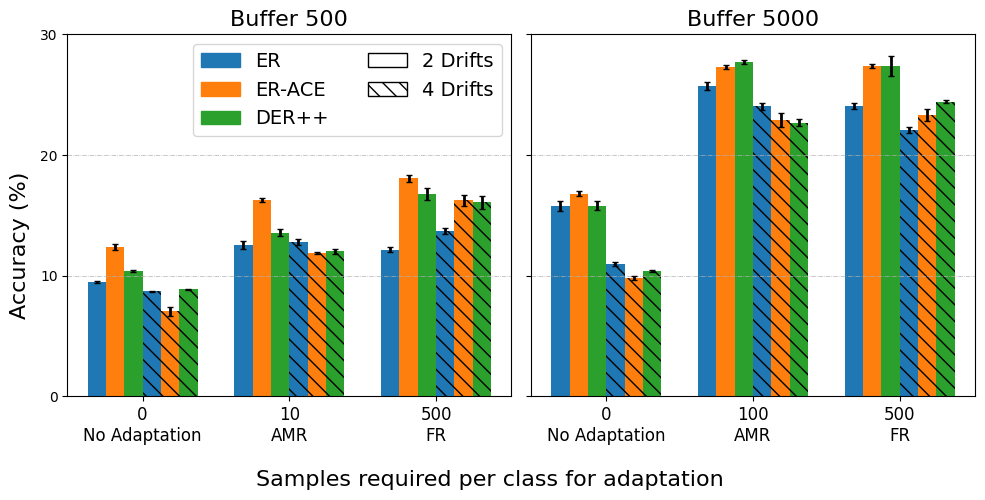

In [67]:
methods = ["ER", "ER-ACE", "DER++", "ER", "ER-ACE", "DER++"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#1f77b4", "#ff7f0e", "#2ca02c"]
hatch_patterns = ["", "", "", "\\\\", "\\\\", "\\\\"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

x_labels = ["0\nNo Adaptation", "10\nAMR", "500\nFR"]
c100_acc_500 = np.array(
    [
        [9.45, 12.57, 12.15],  # ER n-2
        [12.37, 16.29, 18.06],  # ER-ACE n-2
        [10.38, 13.57, 16.78],  # DER++ n-2
        [8.70, 12.79, 13.71],  # ER n-4
        [7.05, 11.87, 16.24],  # ER-ACE n-4
        [8.90, 12.02, 16.08],  # DER++ n-4
    ]
)
c100_acc_500_std = np.array(
    [
        [0.09, 0.34, 0.20],  # ER n-2
        [0.24, 0.17, 0.32],  # ER-ACE n-2
        [0.10, 0.28, 0.53],  # DER++ n-2
        [0.07, 0.27, 0.28],  # ER n-4
        [0.35, 0.09, 0.46],  # ER-ACE n-4
        [0.04, 0.18, 0.55],  # DER++ n-4
    ]
)

plot_grouped_bars(axes[0], c100_acc_500, x_labels, methods, colors, hatch_patterns, y_tick_max=31, errors=c100_acc_500_std)
axes[0].set_title("Buffer 500", fontsize=16)

method_legend = [mpatches.Patch(color=colors[i], label=methods[i]) for i in range(len(methods) // 2)]

drift_legend = [
    mpatches.Patch(facecolor="#fff", edgecolor="black", label="2 Drifts"),
    mpatches.Patch(facecolor="#fff", edgecolor="black", hatch="\\\\", label="4 Drifts")
]

custom_legend = method_legend + drift_legend
legend_labels = [m.get_label() for m in custom_legend]
axes[0].legend(custom_legend, legend_labels, ncol=2, prop={"size": 14})

x_labels = ["0\nNo Adaptation", "100\nAMR", "500\nFR"]
c100_acc_5000 = np.array(
    [
        [15.77, 25.71, 24.04],  # ER n-2
        [16.80, 27.29, 27.36],  # ER-ACE n-2
        [15.81, 27.71, 27.34],  # DER++ n-2
        [10.96, 24.06, 22.05],  # ER n-4
        [9.80, 22.92, 23.33],  # ER-ACE n-4
        [10.43, 22.68, 24.41],  # DER++ n-4
    ]
)
c100_acc_5000_std = np.array(
    [
        [0.43, 0.33, 0.24],  # ER n-2
        [0.19, 0.13, 0.17],  # ER-ACE n-2
        [0.38, 0.15, 0.83],  # DER++ n-2
        [0.14, 0.29, 0.26],  # ER n-4
        [0.14, 0.58, 0.50],  # ER-ACE n-4
        [0.08, 0.27, 0.11],  # DER++ n-4
    ]
)

plot_grouped_bars(axes[1], c100_acc_5000, x_labels, methods, colors, hatch_patterns, y_tick_max=31, errors=c100_acc_5000_std)
axes[1].set_title("Buffer 5000", fontsize=16)

fig.supylabel("Accuracy (%)", fontsize=16)
fig.supxlabel("Samples required per class for adaptation", fontsize=16)

plt.tight_layout()
plt.savefig("CIFAR100-Accuracy-Gain-vs-Adaptation-Strategy.pdf", format="pdf", dpi=300)
plt.show()

# TinyImageNet

## Computational Efficiency

### Buffer 5000

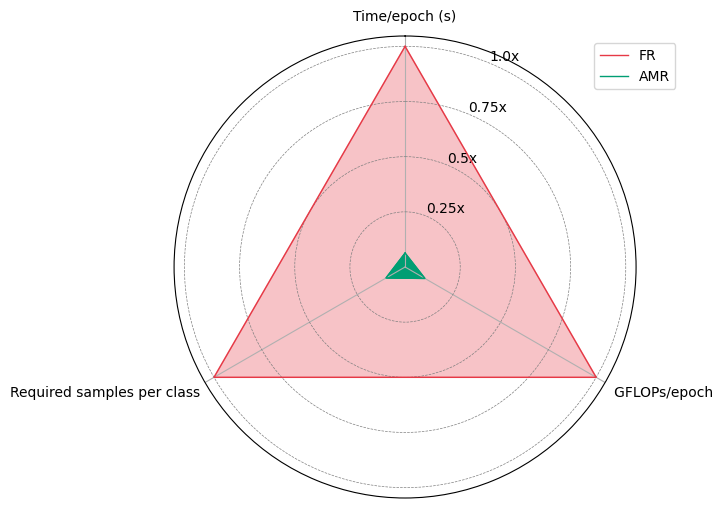

In [23]:
tinyimg_er_5000_n1_full_relearning = [(99.26 + 108.51 + 111.65)/3, 431170.31, 500]
tinyimg_er_5000_n1_buffer_resampling = [(6.08 + 6.17 + 7.86)/3, 44652.86, 50]

plot_single_radar_chart(tinyimg_er_5000_n1_full_relearning, tinyimg_er_5000_n1_buffer_resampling, "Radar-TinyImg.pdf")

# All Datasets

## Radar Plot

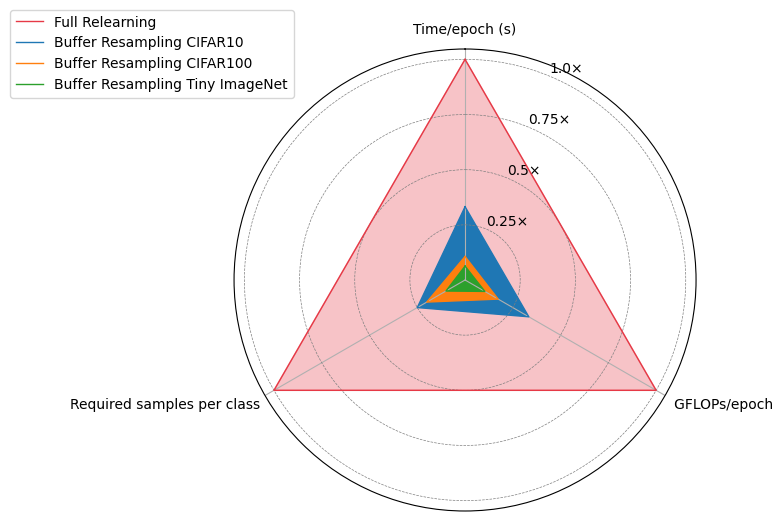

In [24]:
c10_full_relearning_metrics_b5000 = np.mean(
    [
        c10_er_5000_n1_full_relearning,
        c10_er_ace_5000_n1_full_relearning,
        c10_derpp_5000_n1_full_relearning,
    ],
    axis=0,
).tolist()

c10_buffer_resampling_metrics_b5000 = np.mean(
    [
        c10_er_5000_n1_buffer_resampling,
        c10_er_ace_5000_n1_buffer_resampling,
        c10_derpp_5000_n1_buffer_resampling,
    ],
    axis=0,
).tolist()

c100_full_relearning_metrics_b5000 = np.mean(
    [
        c100_er_5000_n1_full_relearning,
        c100_er_ace_5000_n1_full_relearning,
        c100_derpp_5000_n1_full_relearning,
    ],
    axis=0,
).tolist()

c100_buffer_resampling_metrics_b5000 = np.mean(
    [
        c100_er_5000_n1_buffer_resampling,
        c100_er_ace_5000_n1_buffer_resampling,
        c100_derpp_5000_n1_buffer_resampling,
    ],
    axis=0,
).tolist()

tinyimg_full_relearning_metrics_b5000 = tinyimg_er_5000_n1_full_relearning
tinyimg_buffer_resampling_metrics_b5000 = tinyimg_er_5000_n1_buffer_resampling

methods = ["CIFAR10", "CIFAR100", "Tiny ImageNet"]

full_relearning_metrics_b5000 = [
    c10_full_relearning_metrics_b5000,
    c100_full_relearning_metrics_b5000,
    tinyimg_full_relearning_metrics_b5000,
]

buffer_resampling_metrics_b5000 = [
    c10_buffer_resampling_metrics_b5000,
    c100_buffer_resampling_metrics_b5000,
    tinyimg_buffer_resampling_metrics_b5000,
]

plot_radar_chart(
    methods,
    full_relearning_metrics_b5000,
    buffer_resampling_metrics_b5000,
    plot_filename="Computational-Efficiency-Comparison.pdf",
)

## Line Plot

### Datasets vs Samples Required

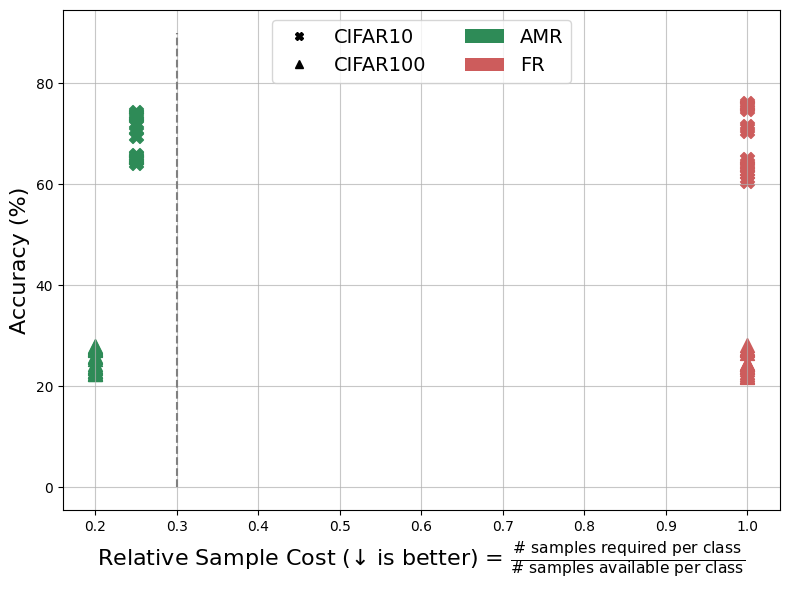

In [31]:
data = [

    # CIFAR10
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92 + 0.42, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92 - 0.42, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58 + 0.32, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58 - 0.32, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65 + 1.13, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65 - 1.13, "SampleCost": 1250/5000},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27 + 0.36, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27 - 0.36, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27 + 0.46, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27 - 0.46, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24 + 0.62, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24, "SampleCost": 1250/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24 + 0.62, "SampleCost": 1250/5000},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27 + 0.41, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27 - 0.41, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07 + 0.45, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07 - 0.45, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76 + 0.25, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76 - 0.25, "SampleCost": 5000/5000},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20 + 0.52, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20 - 0.52, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31 + 0.75, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31 - 0.75, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12 + 0.77, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12, "SampleCost": 5000/5000},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12 - 0.77, "SampleCost": 5000/5000},

    # CIFAR100
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71 + 0.33, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71 - 0.33, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29 + 0.13, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29 - 0.13, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71 + 0.15, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71 - 0.15, "SampleCost": 100/500},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06 + 0.29, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06 - 0.29, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92 + 0.58, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92 - 0.58, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68 + 0.27, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68, "SampleCost": 100/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68 - 0.27, "SampleCost": 100/500},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04 + 0.24, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04 - 0.24, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36 + 0.17, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36 - 0.17, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34 + 0.83, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34 - 0.83, "SampleCost": 500/500},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05 + 0.26, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05 - 0.26, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33 + 0.50, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33 - 0.50, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41 + 0.11, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41, "SampleCost": 500/500},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41 - 0.11, "SampleCost": 500/500},
]

framework_colors = {
    "AMR": "seagreen",
    "FR": "indianred",
}

dataset_markers = {
    "CIFAR10": "X",
    "CIFAR100": "^",
}

fig, ax = plt.subplots(figsize=(8, 6))

for entry in data:
    color = framework_colors.get(entry["Framework"])
    marker = dataset_markers.get(entry["Dataset"])
    ax.scatter(
        entry["SampleCost"],
        entry["Accuracy"],
        c=color,
        marker=marker,
        s=100
    )

ax.set_xlabel(r"Relative Sample Cost (↓ is better) = $\frac{\text{\# samples required per class}}{\text{\# samples available per class}}$", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=16)

# Axis break style
ax.plot((0.3, 0.3), (0, 90), linestyle="--", color="gray")

framework_legend = [
    mpatches.Patch(facecolor='seagreen', label='AMR'),
    mpatches.Patch(facecolor='indianred', label='FR'),
]

dataset_legend = [
    Line2D([0], [0], marker='X', color="black", linestyle='None', label='CIFAR10'),
    Line2D([0], [0], marker='^', color="black", linestyle='None', label='CIFAR100')
]

custom_legend = [
    dataset_legend[0],
    dataset_legend[1],
    framework_legend[0],
    framework_legend[1],
]

legend_labels = [item.get_label() for item in custom_legend]

ax.legend(custom_legend, legend_labels, ncol=2, loc='upper center', frameon=True, prop={"size": 14})

plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()
plt.savefig("Relative-Sample-Cost-vs-Accuracy.pdf", format="pdf", dpi=300)
plt.show()

### Datasets vs Time

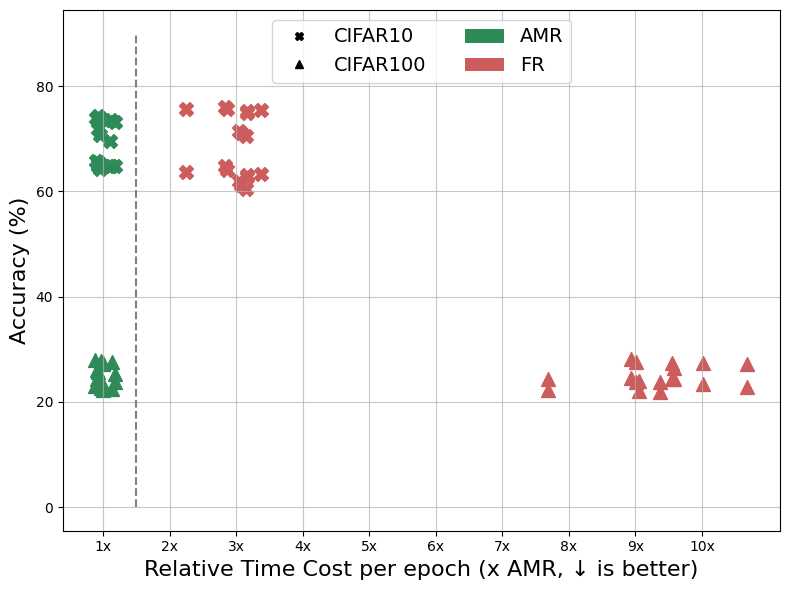

In [32]:
data = [

    # CIFAR10
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92 + 0.42, "TimeCost": 13.83/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92, "TimeCost": 14.41/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92 - 0.42, "TimeCost": 16.84/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58 + 0.32, "TimeCost": 20.41/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58, "TimeCost": 21.00/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58 - 0.32, "TimeCost": 26.65/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65 + 1.13, "TimeCost": 33.35/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65, "TimeCost": 34.29/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65 - 1.13, "TimeCost": 39.83/((33.35 + 34.29 + 39.83)/3)},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27 + 0.36, "TimeCost": 13.83/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27, "TimeCost": 14.41/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27 - 0.36, "TimeCost": 16.84/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27 + 0.46, "TimeCost": 20.41/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27, "TimeCost": 21.00/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27 - 0.46, "TimeCost": 26.65/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24 + 0.62, "TimeCost": 33.35/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24, "TimeCost": 34.29/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24 + 0.62, "TimeCost": 39.83/((33.35 + 34.29 + 39.83)/3)},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27 + 0.41, "TimeCost": 33.70/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27, "TimeCost": 47.52/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27 - 0.41, "TimeCost": 47.62/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07 + 0.45, "TimeCost": 69.01/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07, "TimeCost": 69.76/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07 - 0.45, "TimeCost": 71.60/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76 + 0.25, "TimeCost": 101.75/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76, "TimeCost": 102.46/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76 - 0.25, "TimeCost": 120.76/((33.35 + 34.29 + 39.83)/3)},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20 + 0.52, "TimeCost": 33.70/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20, "TimeCost": 47.52/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20 - 0.52, "TimeCost": 47.62/((13.83 + 14.41 + 16.84)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31 + 0.75, "TimeCost": 69.01/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31, "TimeCost": 69.76/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31 - 0.75, "TimeCost": 71.60/((20.41 + 21.00 + 26.65)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12 + 0.77, "TimeCost": 101.75/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12, "TimeCost": 102.46/((33.35 + 34.29 + 39.83)/3)},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12 - 0.77, "TimeCost": 120.76/((33.35 + 34.29 + 39.83)/3)},

    # CIFAR100
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71 + 0.33, "TimeCost": 4.79/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71, "TimeCost": 4.87/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71 - 0.33, "TimeCost": 6.21/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29 + 0.13, "TimeCost": 7.59/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29, "TimeCost": 7.69/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29 - 0.13, "TimeCost": 7.71/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71 + 0.15, "TimeCost": 10.18/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71, "TimeCost": 11.13/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71 - 0.15, "TimeCost": 13.11/((10.18 + 11.13 + 13.11)/3)},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06 + 0.29, "TimeCost": 4.79/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06, "TimeCost": 4.87/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06 - 0.29, "TimeCost": 6.21/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92 + 0.58, "TimeCost": 7.59/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92, "TimeCost": 7.69/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92 - 0.58, "TimeCost": 7.71/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68 + 0.27, "TimeCost": 10.18/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68, "TimeCost": 11.13/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68 - 0.27, "TimeCost": 13.11/((10.18 + 11.13 + 13.11)/3)},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04 + 0.24, "TimeCost": 40.63/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04, "TimeCost": 47.87/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04 - 0.24, "TimeCost": 49.53/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36 + 0.17, "TimeCost": 69.06/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36, "TimeCost": 76.79/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36 - 0.17, "TimeCost": 81.87/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34 + 0.83, "TimeCost": 102.51/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34, "TimeCost": 109.63/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34 - 0.83, "TimeCost": 109.92/((10.18 + 11.13 + 13.11)/3)},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05 + 0.26, "TimeCost": 40.63/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05, "TimeCost": 47.87/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05 - 0.26, "TimeCost": 49.53/((4.79 + 4.87 + 6.21)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33 + 0.50, "TimeCost": 69.06/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33, "TimeCost": 76.79/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33 - 0.50, "TimeCost": 81.87/((7.59 + 7.69 + 7.71)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41 + 0.11, "TimeCost": 102.51/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41, "TimeCost": 109.63/((10.18 + 11.13 + 13.11)/3)},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41 - 0.11, "TimeCost": 109.92/((10.18 + 11.13 + 13.11)/3)},
]

framework_colors = {
    "AMR": "seagreen",
    "FR": "indianred",
}

dataset_markers = {
    "CIFAR10": "X",
    "CIFAR100": "^",
}

fig, ax = plt.subplots(figsize=(8, 6))

for entry in data:
    color = framework_colors.get(entry["Framework"])
    marker = dataset_markers.get(entry["Dataset"])
    ax.scatter(
        entry["TimeCost"],
        entry["Accuracy"],
        c=color,
        marker=marker,
        s=100
    )

ax.set_xlabel("Relative Time Cost per epoch (x AMR, ↓ is better)", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=16)
ax.set_xticks(list(range(1, 11)))
ax.set_xticklabels([str(i) + "x" for i in range(1, 11)])

# Axis break style
ax.plot((1.5, 1.5), (0, 90), linestyle="--", color="gray")

framework_legend = [
    mpatches.Patch(facecolor="seagreen", label="AMR"),
    mpatches.Patch(facecolor="indianred", label="FR"),
]

dataset_legend = [
    Line2D([0], [0], marker="X", color="black", linestyle="None", label="CIFAR10"),
    Line2D([0], [0], marker="^", color="black", linestyle="None", label="CIFAR100"),
]

custom_legend = [
    dataset_legend[0],
    dataset_legend[1],
    framework_legend[0],
    framework_legend[1],
]

legend_labels = [item.get_label() for item in custom_legend]

ax.legend(custom_legend, legend_labels, ncol=2, loc="upper center", frameon=True, prop={"size": 14})

plt.grid(True, linestyle="-", alpha=0.7)
plt.tight_layout()
plt.savefig("Relative-Time-Cost-vs-Accuracy.pdf", format="pdf", dpi=300)
plt.show()

### Datasets vs GFLOPs

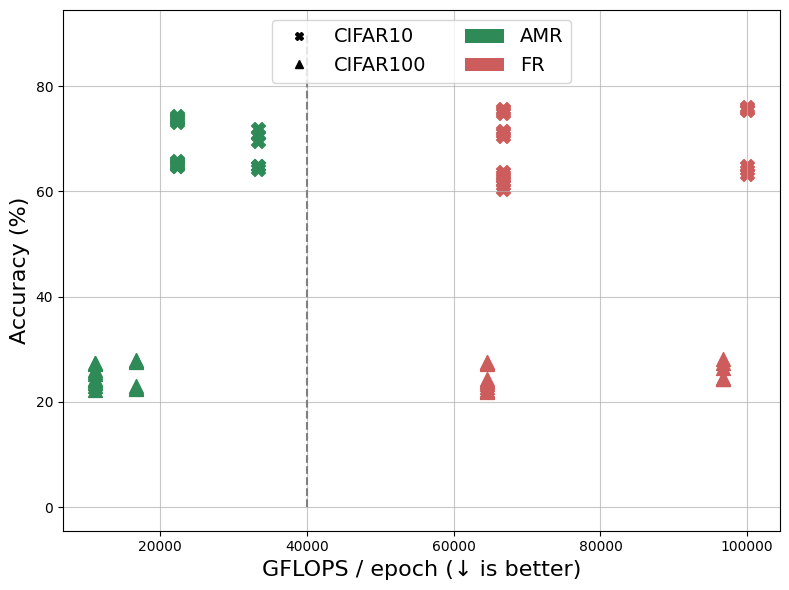

In [33]:
data = [

    # CIFAR10
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92 + 0.42, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 73.92 - 0.42, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58 + 0.32, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 73.58 - 0.32, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65 + 1.13, "GFLOPSCost": 33379.30},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65, "GFLOPSCost": 33379.30},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 70.65 - 1.13, "GFLOPSCost": 33379.30},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27 + 0.36, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "AMR", "Accuracy": 65.27 - 0.36, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27 + 0.46, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 65.27 - 0.46, "GFLOPSCost": 22252.87},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24 + 0.62, "GFLOPSCost": 33379.30},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24, "GFLOPSCost": 33379.30},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "AMR", "Accuracy": 64.24 + 0.62, "GFLOPSCost": 33379.30},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27 + 0.41, "GFLOPSCost": 66687.50},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27, "GFLOPSCost": 66687.50},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 75.27 - 0.41, "GFLOPSCost": 66687.50},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07 + 0.45, "GFLOPSCost": 66687.51},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07, "GFLOPSCost": 66687.51},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 71.07 - 0.45, "GFLOPSCost": 66687.51},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76 + 0.25, "GFLOPSCost": 100031.26},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76, "GFLOPSCost": 100031.26},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 75.76 - 0.25, "GFLOPSCost": 100031.26},

    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20 + 0.52, "GFLOPSCost": 66687.50},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20, "GFLOPSCost": 66687.50},
    {"Dataset": "CIFAR10", "Method": "ER", "Framework": "FR", "Accuracy": 63.20 - 0.52, "GFLOPSCost": 66687.50},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31 + 0.75, "GFLOPSCost": 66687.51},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31, "GFLOPSCost": 66687.51},
    {"Dataset": "CIFAR10", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 61.31 - 0.75, "GFLOPSCost": 66687.51},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12 + 0.77, "GFLOPSCost": 100031.26},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12, "GFLOPSCost": 100031.26},
    {"Dataset": "CIFAR10", "Method": "DER++", "Framework": "FR", "Accuracy": 64.12 - 0.77, "GFLOPSCost": 100031.26},

    # CIFAR100
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71 + 0.33, "GFLOPSCost": 11164.76},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71, "GFLOPSCost": 11164.76},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 25.71 - 0.33, "GFLOPSCost": 11164.76},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29 + 0.13, "GFLOPSCost": 11164.77},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29, "GFLOPSCost": 11164.77},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 27.29 - 0.13, "GFLOPSCost": 11164.77},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71 + 0.15, "GFLOPSCost": 16747.15},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71, "GFLOPSCost": 16747.15},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 27.71 - 0.15, "GFLOPSCost": 16747.15},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06 + 0.29, "GFLOPSCost": 11164.76},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06, "GFLOPSCost": 11164.76},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "AMR", "Accuracy": 24.06 - 0.29, "GFLOPSCost": 11164.76},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92 + 0.58, "GFLOPSCost": 11164.77},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92, "GFLOPSCost": 11164.77},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "AMR", "Accuracy": 22.92 - 0.58, "GFLOPSCost": 11164.77},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68 + 0.27, "GFLOPSCost": 16747.15},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68, "GFLOPSCost": 16747.15},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "AMR", "Accuracy": 22.68 - 0.27, "GFLOPSCost": 16747.15},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04 + 0.24, "GFLOPSCost": 64499.59},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04, "GFLOPSCost": 64499.59},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 24.04 - 0.24, "GFLOPSCost": 64499.59},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36 + 0.17, "GFLOPSCost": 64499.64},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36, "GFLOPSCost": 64499.64},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 27.36 - 0.17, "GFLOPSCost": 64499.64},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34 + 0.83, "GFLOPSCost": 96749.44},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34, "GFLOPSCost": 96749.44},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 27.34 - 0.83, "GFLOPSCost": 96749.44},

    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05 + 0.26, "GFLOPSCost": 64499.59},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05, "GFLOPSCost": 64499.59},
    {"Dataset": "CIFAR100", "Method": "ER", "Framework": "FR", "Accuracy": 22.05 - 0.26, "GFLOPSCost": 64499.59},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33 + 0.50, "GFLOPSCost": 64499.64},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33, "GFLOPSCost": 64499.64},
    {"Dataset": "CIFAR100", "Method": "ER-ACE", "Framework": "FR", "Accuracy": 23.33 - 0.50, "GFLOPSCost": 64499.64},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41 + 0.11, "GFLOPSCost": 96749.44},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41, "GFLOPSCost": 96749.44},
    {"Dataset": "CIFAR100", "Method": "DER++", "Framework": "FR", "Accuracy": 24.41 - 0.11, "GFLOPSCost": 96749.44},
]

framework_colors = {
    "AMR": "seagreen",
    "FR": "indianred",
}

dataset_markers = {
    "CIFAR10": "X",
    "CIFAR100": "^",
}

fig, ax = plt.subplots(figsize=(8, 6))

for entry in data:
    color = framework_colors.get(entry["Framework"])
    marker = dataset_markers.get(entry["Dataset"])
    ax.scatter(
        entry["GFLOPSCost"],
        entry["Accuracy"],
        c=color,
        marker=marker,
        s=100
    )

ax.set_xlabel("GFLOPS / epoch (↓ is better)", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=16)

# Axis break style
ax.plot((40000, 40000), (0, 90), linestyle="--", color="gray")

framework_legend = [
    mpatches.Patch(facecolor="seagreen", label="AMR"),
    mpatches.Patch(facecolor="indianred", label="FR"),
]

dataset_legend = [
    Line2D([0], [0], marker="X", color="black", linestyle="None", label="CIFAR10"),
    Line2D([0], [0], marker="^", color="black", linestyle="None", label="CIFAR100"),
]

custom_legend = [
    dataset_legend[0],
    dataset_legend[1],
    framework_legend[0],
    framework_legend[1],
]

legend_labels = [item.get_label() for item in custom_legend]

ax.legend(custom_legend, legend_labels, ncol=2, loc="upper center", frameon=True, prop={"size": 14})

plt.grid(True, linestyle="-", alpha=0.7)
plt.tight_layout()
plt.savefig("GFLOPS-vs-Accuracy.pdf", format="pdf", dpi=300)
plt.show()